# Model selection

## Learning objectives

* Select different machine learning models in `scikit-learn`, and train them 
* Understand that models have different characteristics, including flexibility, parameterisation, and more, which affects model selection and efficacy
* Explain the model flexibility/over-fit trade off 
* Explain what model train and test error are, and how these relate to overfitting 

## Logistic regression

* Here is a simple binary classification task with a linear model.
* First, we will create some binary classified data.
* Then we will train a model that can classify new points into one of the two classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

# Generate binary classification dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1000, 2), y shape: (1000,)


In [3]:
print(f"X feature vector: {X[0]}")

X feature vector: [0.4666179  3.86571303]


In [4]:
print(f"y label: {y[0]}")

y label: 0


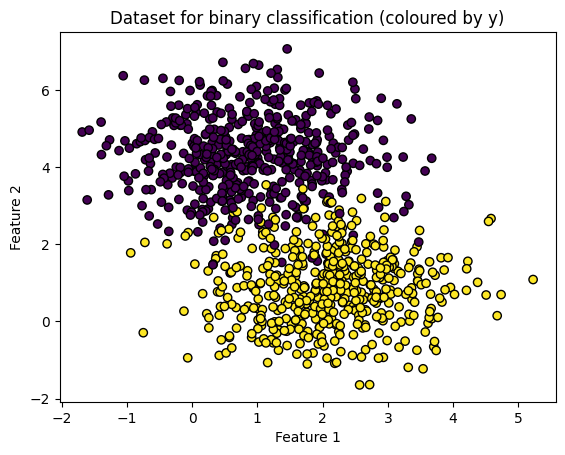

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset for binary classification (coloured by y)')
plt.show()

### So its time to train a model?

* Not quite. Lets split our `X` and `y` into `X_train` and `X_test` and `y_train` and `y_test`.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

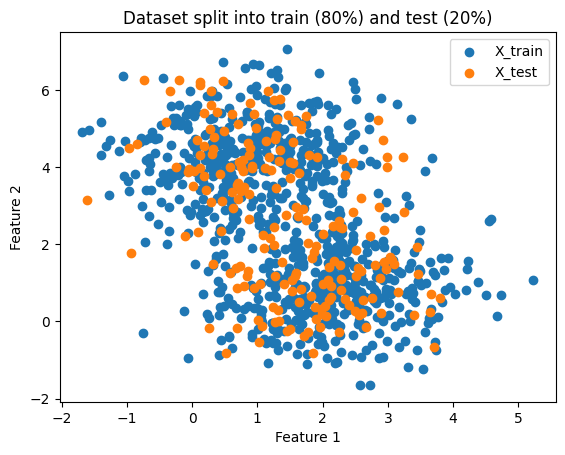

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], label="X_train")
plt.scatter(X_test[:, 0], X_test[:, 1], label="X_test")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset split into train (80%) and test (20%)')
plt.legend()
plt.show()

* We will now train our model with `X_train` and `y_train`.

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

* Now that we have a trained model, we can evaluate how the model performs on the test set that we held out at the start.
* Use the model to create predictions for the test data:

In [9]:
y_pred = model.predict(X_test)

* Then assess the accuracy against the true labels

In [10]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


* Lets create some plots to show what is happening

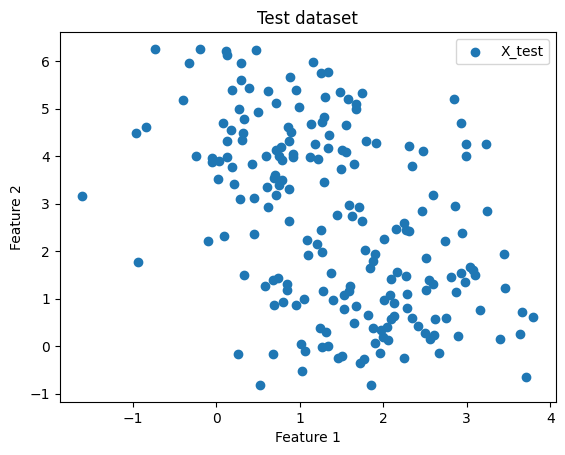

In [11]:
plt.scatter(X_test[:, 0], X_test[:, 1], label="X_test")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test dataset')
plt.legend()
plt.show()

/tmp/ipykernel_38930/2276081007.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


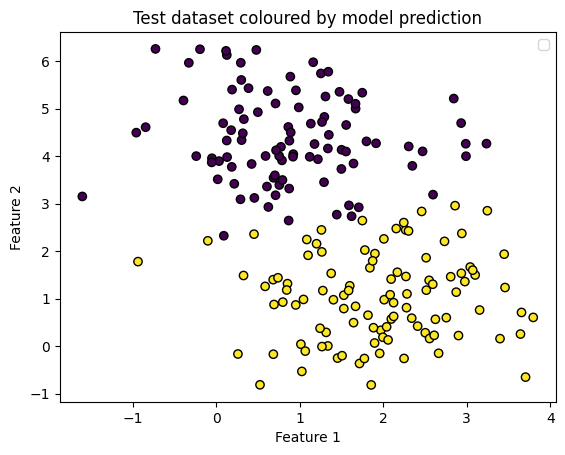

In [12]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test dataset coloured by model prediction')
plt.legend()
plt.show()

* Which points were incorrectly classified? We know that ~5% of 1000 were.

In [13]:
misclassified = X_test[y_test != y_pred]

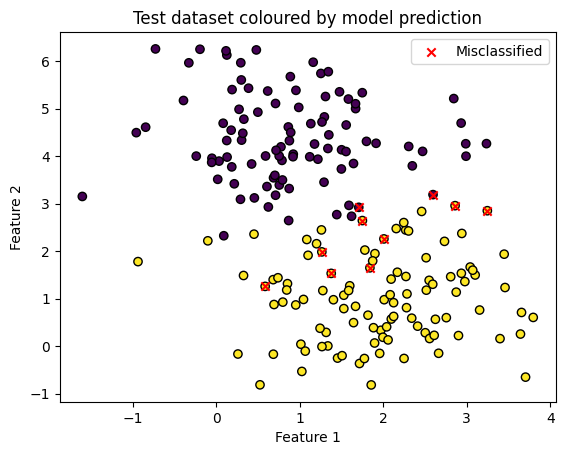

In [14]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolors='k')
plt.scatter(misclassified[:, 0], misclassified[:, 1], color='red', marker='x', label='Misclassified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test dataset coloured by model prediction')
plt.legend()
plt.show()


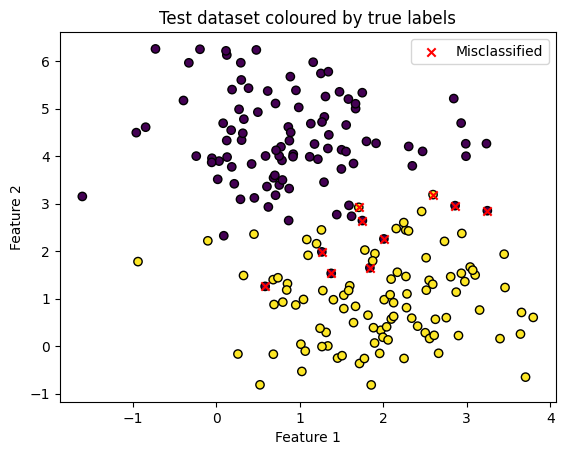

In [15]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
plt.scatter(misclassified[:, 0], misclassified[:, 1], color='red', marker='x', label='Misclassified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test dataset coloured by true labels')
plt.legend()
plt.show()

### Summary

* We have used a linear model to classify points into two classes.
* We achieves a 95% accuracy score on the test set: this means that given a new (representative) point, we should have a 95% chance of this point being accurately classified.

## What happens when our data is not representative?

* If our input data distribution changes, our model performance will suffer.
* We can change our toy dataset fairly easily with `scikit-learn`.
* This is still a binary classification task. We can assess the classification performance of the model on the new dataset.

In [16]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


* Our model is now as good (or bad) as flipping a coin.
* This makes sense: our data distribution has changed, and we need to re-train our model. Generalising to a random unseen dataset was never going to work!
* Lets create a linear model, train it on our new dataset, and assess its accuracy on the holdout test set.

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.86


Much better!

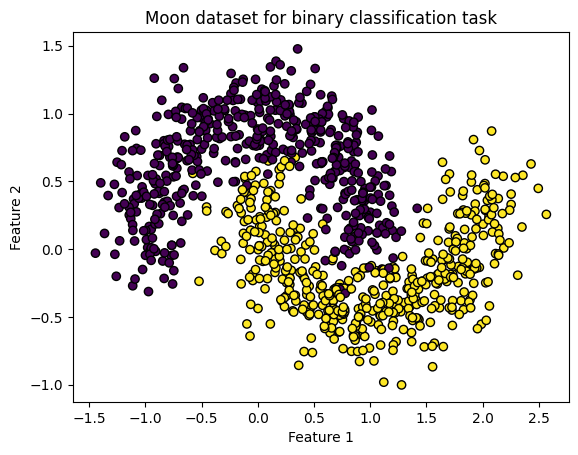

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moon dataset for binary classification task')
plt.show()

* Lets plot the misclassified points, but also the decision boundary
* For binary logistic regression, this is the line where the probability of belonging to a class is 0.5

In [21]:
def plot_boundary(X, y, model, misclassified, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 200),
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.scatter(
        misclassified[:, 0],
        misclassified[:, 1],
        color="red",
        marker="x",
        label="Misclassified",
    )
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

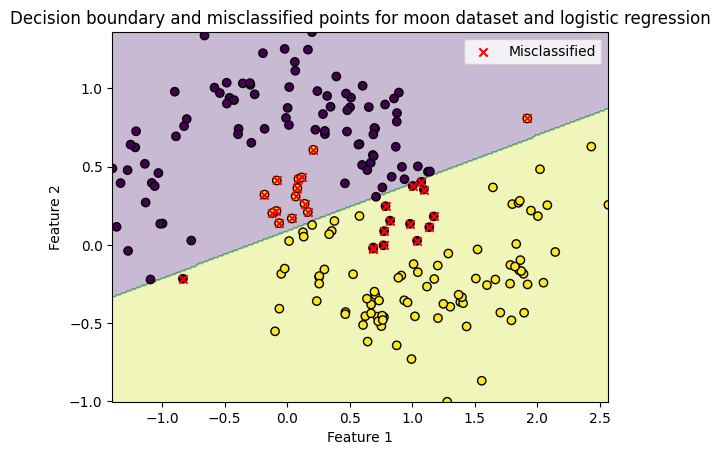

In [22]:
# Find the misclassified points as before
misclassified = X_test[y_test != y_pred]

title="Decision boundary and misclassified points for moon dataset and logistic regression"
plot_boundary(X_test, y_test, model, misclassified, title)


## Changing model

* We can potentially get improved performance if we select a new model
* Lets use an SVM (support Vector Machine) with a radial basel function kernel.
* This can model non-linear decision boundaries.

In [23]:
from sklearn.svm import SVC

# Train SVM with RBF kernel
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

SVC()

In [24]:
# Predict and evaluate as before
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


* Great! We improved our prediction accuracy by 11%.
* Lets visualise the classification on the test set again, to show the non-linear decision boundary

In [25]:
# Identify misclassified points as before
misclassified = X_test[y_test != y_pred]

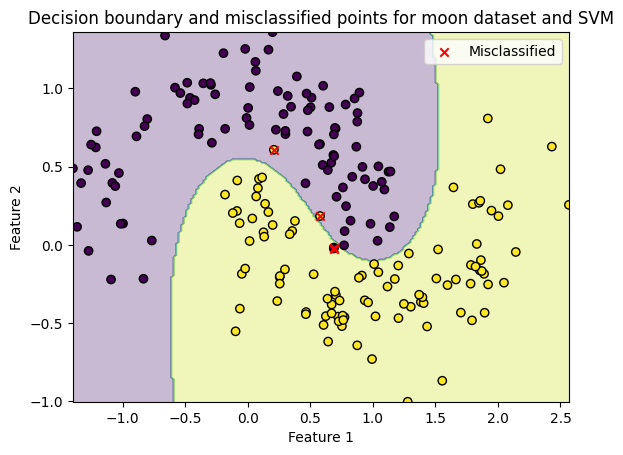

In [26]:
title="Decision boundary and misclassified points for moon dataset and SVM"
plot_boundary(X_test, y_test, model, misclassified, title)